In [209]:
# !pip install wordcloud
# !pip install gensim
# !pip install spacy

In [210]:
# references
# https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [1]:
# Importing modules
import pandas as pd
import os

# LDA Model
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
import spacy

# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the wordcloud library
from wordcloud import WordCloud

# Visualize the topics
import pyLDAvis.gensim
import pickle 
import pyLDAvis


In [2]:
# Read data into questions
df = pd.read_csv('final/cleaned_per_post_final_data.csv', encoding = "ISO-8859-1")

# Print head
df.head()

,tweetDate,twitterId,handle,text,profileUrl,name,tweetLink,timestamp,query,rtCount,likesCount,hashtag,tweetYear,tweetDay,tweetHr
0,Tue Nov 28 02:36:51 +0000 2017,8.750000e+17,DPASG,Truly heartbreaking esp during @awarenews's #1...,https://twitter.com/DPASG,Disabled People's Association (DPA) Singapore,https://twitter.com/DPASG/status/9353366574645...,2020-03-09T08:56:59.162Z,https://twitter.com/search?q=%2316daysSG&src=t...,5.0,0.0,#16daysSG,2017,Tue,2
1,Mon Nov 27 09:39:17 +0000 2017,2.871847e+08,sumithakutty,Will be making some more noise than usual on #...,https://twitter.com/sumithakutty,Sumitha N. Kutty,https://twitter.com/sumithakutty/status/935080...,2020-03-09T08:56:59.163Z,https://twitter.com/search?q=%2316daysSG&src=t...,0.0,1.0,#16daysSG,2017,Mon,9
2,Sat Nov 25 05:14:14 +0000 2017,8.750000e+17,DPASG,25th Nov is the Intl Day for Elimination of Vi...,https://twitter.com/DPASG,Disabled People's Association (DPA) Singapore,https://twitter.com/DPASG/status/9342890992334...,2020-03-09T08:56:59.163Z,https://twitter.com/search?q=%2316daysSG&src=t...,2.0,0.0,#16daysSG,2017,Sat,5
3,Mon Nov 27 03:53:27 +0000 2017,8.750000e+17,DPASG,Day 3 of #16DaysSG #16DaysofActivism2017. Did ...,https://twitter.com/DPASG,Disabled People's Association (DPA) Singapore,https://twitter.com/DPASG/status/9349935472661...,2020-03-09T08:56:59.163Z,https://twitter.com/search?q=%2316daysSG&src=t...,3.0,2.0,#16daysSG,2017,Mon,3
4,Sat Nov 25 08:00:39 +0000 2017,4.546456e+08,RedWhiteBlueDot,LetÃ¢ÂÂs Unite with We Can! Singapore for #1...,https://twitter.com/RedWhiteBlueDot,U.S. Embassy Singapore,https://twitter.com/RedWhiteBlueDot/status/934...,2020-03-09T08:56:59.163Z,https://twitter.com/search?q=%2316daysSG&src=t...,6.0,6.0,#16daysSG,2017,Sat,8


## Data Cleaning


In [3]:
# Remove the columns
df = df[['text']]

# Print out the first rows of questions
df.head()

,text
0,Truly heartbreaking esp during @awarenews's #1...
1,Will be making some more noise than usual on #...
2,25th Nov is the Intl Day for Elimination of Vi...
3,Day 3 of #16DaysSG #16DaysofActivism2017. Did ...
4,LetÃ¢ÂÂs Unite with We Can! Singapore for #1...


In [4]:
# Remove links
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'https\S+', '', regex=True)

# check if link is removed
df['text'].iloc[1]

'Will be making some more noise than usual on #ViolenceAgainstWomen (VAW) for the next few days. \n\nBe a part of the "Let\'s Unite!" movement in #Singapore (Nov 25 - Dec 10). Pledge here:  \n\n#16DaysSG #MeToo #NowWhat'

In [5]:
# remove new line characters
df['text'] = df['text'].replace(r'\n', '', regex=True)

# check if new line characters are removed
df['text'].iloc[1]

'Will be making some more noise than usual on #ViolenceAgainstWomen (VAW) for the next few days. Be a part of the "Let\'s Unite!" movement in #Singapore (Nov 25 - Dec 10). Pledge here:  #16DaysSG #MeToo #NowWhat'

#### Text Pre-Processing
We have use gen-sim simple preprocess util to 
(1) Tokenize the textual data.
(2) convert to list of lowercase tokens
(3) deacc = True removes punctuation


In [6]:
import gensim 

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations and special characters

data_words = list(sent_to_words(df['text']))

print(data_words)

[['truly', 'heartbreaking', 'esp', 'during', 'awarenews', 'dayssg', 'daysofactivism', 'women', 'disabilities', 'are', 'at', 'increased', 'risk', 'of', 'abuse', 'amp', 'we', 'need', 'to', 'do', 'more', 'to', 'work', 'together', 'and', 'protect', 'those', 'who', 'may', 'not', 'know', 'how', 'to', 'speak', 'up', 'against', 'or', 'identify', 'such', 'abuse'], ['will', 'be', 'making', 'some', 'more', 'noise', 'than', 'usual', 'on', 'vaw', 'for', 'the', 'next', 'few', 'days', 'be', 'part', 'of', 'the', 'let', 'unite', 'movement', 'in', 'singapore', 'nov', 'dec', 'pledge', 'here', 'dayssg', 'metoo', 'nowwhat'], ['th', 'nov', 'is', 'the', 'intl', 'day', 'for', 'elimination', 'of', 'violence', 'against', 'women', 'dpasg', 'will', 'be', 'sharing', 'interesting', 'facts', 'in', 'support', 'of', 'organisations', 'such', 'as', 'awarenews', 'that', 'work', 'tirelessly', 'towards', 'ending', 'violence', 'against', 'women', 'we', 'will', 'also', 'be', 'using', 'the', 'hashtag', 'dayssg', 'amp', 'vaw',

## Removal of stopwords

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['sexual', 'harassment','harassed' 'women', 'violence', 'rape', 'raping', 'raped', 'aimforzerosg', '16dayssg','singapore', 'metoo', 'monicabaey', 'assault', 'misconduct', 'violence', 'voyeurism', 'go', 'take', 'make', 'case', 'voyeuristic' ])
print(stop_words)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Phrase Modelling for Bi-grams

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

## Lemmatization

In [9]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['truly', 'heartbreake', 'awarenews', 'daysofactivism', 'woman', 'disability', 'increase', 'risk', 'abuse', 'amp', 'need', 'work', 'together', 'protect', 'may', 'know', 'speak', 'identify', 'abuse']]


In [11]:
print(data_words_bigrams)

[['truly', 'heartbreaking', 'esp', 'awarenews', 'dayssg', 'daysofactivism', 'women', 'disabilities', 'increased', 'risk', 'abuse', 'amp', 'need', 'work', 'together', 'protect', 'may', 'know', 'speak', 'identify', 'abuse'], ['making', 'noise', 'usual', 'vaw', 'next', 'days', 'part', 'let', 'unite', 'movement', 'nov', 'dec', 'pledge', 'dayssg', 'nowwhat'], ['th', 'nov', 'intl', 'day', 'elimination', 'women', 'dpasg', 'sharing', 'interesting', 'facts', 'support', 'organisations', 'awarenews', 'work', 'tirelessly', 'towards', 'ending', 'women', 'also', 'using', 'hashtag', 'dayssg', 'amp', 'vaw', 'see', 'thread'], ['day', 'dayssg', 'daysofactivism', 'know', 'women', 'disabilities', 'likely', 'experience', 'domestic', 'women', 'disabilities', 'especially', 'may', 'dependent', 'abusers', 'care'], ['leta', 'unite', 'daysofactivism', 'gender', 'based', 'women', 'deserve', 'treated', 'dignity', 'respect', 'dayssg'], ['women', 'always', 'black', 'blue', 'find', 'forms', 'dayssg'], ['also', 'women

# Exploratory Data Analysis

## Creating word cloud

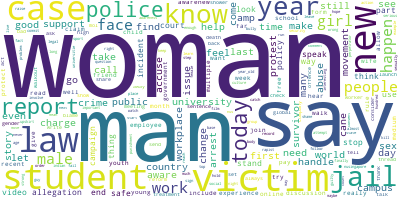

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud
import itertools

# Join the different processed titles together
list_of_words = list(itertools.chain.from_iterable(data_lemmatized))
long_string = ','.join(word for word in list_of_words)
long_string

# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', collocations = False,  random_state=1)

# # Generate a word cloud
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

## Data Transformation: Corpus and Dictionary
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.

Ref: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Filter out tokens that appear in only 1 documents and appear in more than 90% of the documents
id2word.filter_extremes(no_below=2, no_above=0.9)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])
# print(id2word[:10])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(15, 2), (16, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(3, 1), (4, 1), (7, 1), (8, 1), (15, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(15, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(15, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(0, 1), (15, 1), (27, 1), (41, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(7, 1), (17, 1), (40, 1), (50, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(42, 1)], [(7, 1), (9, 1), (15, 2), (23, 1), (29, 1), (34, 1), (40, 1), (59, 1), (65, 1), (66, 1), (67, 1), (68, 1)]]


In [16]:
print(len(corpus))

1170


In [15]:
print(id2word)

Dictionary(1313 unique tokens: ['abuse', 'amp', 'awarenews', 'daysofactivism', 'disability']...)


## Create Top 10 Most Common words

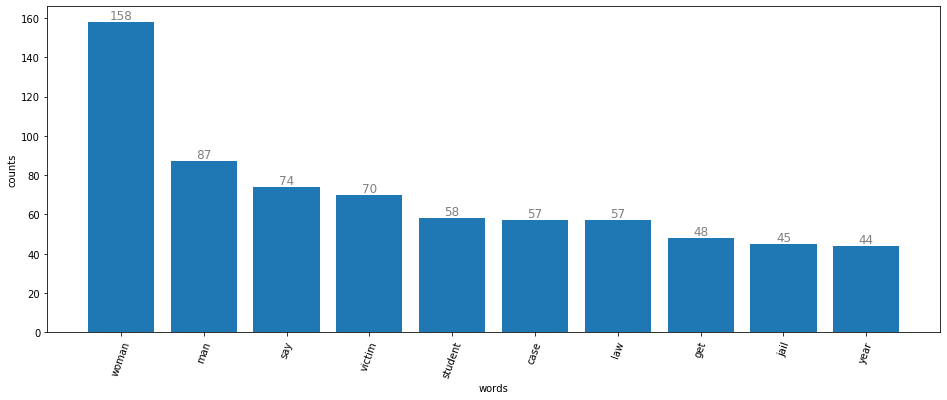

In [17]:
import operator


word_freq = []
word_list = []
count_dict = {}
for n in id2word.values():
    count_dict[n] = list_of_words.count(n)
sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)[0:10]

plt.figure(figsize=(16,6))
plt.bar(range(len(sorted_dict)), [val[1] for val in sorted_dict], align='center')
plt.xticks(range(len(sorted_dict)), [val[0] for val in sorted_dict])
plt.xticks(rotation=70)
plt.xlabel('words')
plt.ylabel('counts')

# setting data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='grey', ha='center', va='bottom')
    
plt.show()




## Base Model

In [18]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=0,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [19]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"sex" + 0.025*"story" + 0.023*"know" + 0.021*"day" + 0.021*"call" + '
  '0.020*"new" + 0.016*"movement" + 0.015*"much" + 0.014*"abuse" + '
  '0.014*"play"'),
 (1,
  '0.028*"face" + 0.021*"stand" + 0.019*"campaign" + 0.019*"workplace" + '
  '0.018*"aware" + 0.017*"launch" + 0.014*"charge" + 0.013*"worker" + '
  '0.012*"force" + 0.011*"go"'),
 (2,
  '0.045*"woman" + 0.028*"case" + 0.026*"man" + 0.018*"change" + '
  '0.017*"accuse" + 0.015*"handle" + 0.014*"law" + 0.011*"offence" + '
  '0.011*"charge" + 0.011*"multiple"'),
 (3,
  '0.026*"happen" + 0.026*"law" + 0.025*"victim" + 0.023*"child" + '
  '0.021*"today" + 0.018*"girl" + 0.015*"country" + 0.013*"discussion" + '
  '0.013*"start" + 0.012*"new"'),
 (4,
  '0.026*"year" + 0.017*"woman" + 0.016*"work" + 0.011*"country" + '
  '0.011*"cane" + 0.010*"night" + 0.010*"find" + 0.010*"incident" + '
  '0.009*"last" + 0.009*"think"'),
 (5,
  '0.019*"people" + 0.018*"stop" + 0.015*"ban" + 0.015*"good" + 0.014*"safe" + '
  '0.013*"th

In [20]:
# Evaluate base model- Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4811594000498829


## Hyperparameter Tuning

### Remove stopwords & known search terms

Remove stop words that appear in high frequency and is useless

Remove known key search terms used for data scrapping such as weight loss, diet,  lose weight

In [228]:
# supporting function
# def compute_coherence_values(corpus, dictionary, k):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

In [229]:
#iterate over possible number of topics
# topic_param = [5,10,15,20,25,30,35,40]
# coherence_score = []

# for k in topic_param:
#     for a in alpha:
#         for b in beta:
#             cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
#             coherence_score.append(cv)

# param_tuning_coherence = pd.DataFrame()
# param_tuning_coherence["topic_param"] = topic_param
# param_tuning_coherence['coherence_score'] = coherence_score
# param_tuning_coherence

In [230]:
# Show graph
# plt.figure(figsize=(16, 8))
# plt.plot(topic_param, param_tuning_coherence['coherence_score'])

# plt.title("Choosing Optimal LDA Model")
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence Scores")
# plt.show()

## Final Model

In [21]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=0,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [22]:
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"sex" + 0.008*"rule" + 0.007*"student" + 0.007*"campus" + '
  '0.006*"abuse" + 0.005*"call" + 0.005*"universitie" + 0.005*"shower" + '
  '0.005*"story" + 0.005*"play"'),
 (1,
  '0.005*"count" + 0.004*"burn" + 0.004*"year" + 0.004*"less" + '
  '0.004*"suspension" + 0.004*"expulsion" + 0.003*"cane" + 0.003*"record" + '
  '0.003*"know" + 0.003*"girl"'),
 (2,
  '0.020*"woman" + 0.014*"man" + 0.013*"accuse" + 0.007*"multiple" + '
  '0.007*"need" + 0.007*"amp" + 0.006*"workplace" + 0.006*"student" + '
  '0.006*"allegation" + 0.005*"charge"'),
 (3,
  '0.009*"victim" + 0.006*"get" + 0.006*"new" + 0.005*"claim" + '
  '0.005*"country" + 0.004*"feel" + 0.004*"also" + 0.004*"make" + 0.004*"kill" '
  '+ 0.004*"almost"'),
 (4,
  '0.010*"today" + 0.007*"make" + 0.006*"woman" + 0.005*"read" + 0.004*"force" '
  '+ 0.004*"mean" + 0.004*"write" + 0.004*"claim" + 0.004*"night" + '
  '0.003*"think"'),
 (5,
  '0.003*"good" + 0.003*"ban" + 0.003*"jail" + 0.003*"banker" + 0.003*"former" '
  '+ 0

## Document Topic Matrix

In [23]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse = True))   
  
  

In [24]:
doc_num, topic_num, prob = [], [], []
print(lda_model.get_document_topics(corpus))
for n in range(len(df)):
    get_document_topics = lda_model.get_document_topics(corpus[n])
    doc_num.append(n)
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    topic_num.append(sorted_doc_topics[0][0])
    prob.append(sorted_doc_topics[0][1])
df['Doc'] = doc_num
df['Topic'] = topic_num
df['Probability'] = prob
df.to_csv("final/doc_topic_matrix.csv", index=False)
# df

In [26]:
print(corpus)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(15, 2), (16, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(3, 1), (4, 1), (7, 1), (8, 1), (15, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(15, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(15, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(0, 1), (15, 1), (27, 1), (41, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(7, 1), (17, 1), (40, 1), (50, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(42, 1)], [(7, 1), (9, 1), (15, 2), (23, 1), (29, 1), (34, 1), (40, 1), (59, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [], [(7, 1), (53, 1), (57, 1), (63, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [(7, 1), (65, 1), (74, 1)], [(47, 1), (48, 1), (49, 1), 

In [27]:
print(id2word)

Dictionary(1313 unique tokens: ['abuse', 'amp', 'awarenews', 'daysofactivism', 'disability']...)


In [28]:
print(type(id2word))
print(type(corpus))

<class 'gensim.corpora.dictionary.Dictionary'>
<class 'list'>


## Visualize Topics

In [25]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
LDAvis_prepared

C:\Users\Xuesi\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.005187 -0.006396       1        1   5.068475
1      0.002319 -0.000460       2        1   2.624331
2      0.001910  0.012231       3        1   7.957364
3      0.003562 -0.003080       4        1   4.490508
4      0.001514 -0.009936       5        1   6.471584
5      0.002072 -0.001389       6        1   1.536201
6     -0.038651 -0.021435       7        1   9.917814
7     -0.003581  0.069181       8        1  10.629302
8      0.001864 -0.007124       9        1   6.033832
9     -0.009025  0.006711      10        1   7.659652
10    -0.000833 -0.008788      11        1   4.377096
11    -0.007985  0.000173      12        1   8.910762
12    -0.001217 -0.022470      13        1   6.189753
13    -0.016090  0.000776      14        1   8.511869
14     0.069330 -0.007995      15        1   9.621453, topic_info=    Category       Freq    Term      Total  loglift  logprob
319  Default  21.000000    jail  21.000000  30.0000  30.0000
68   Default  21.000000    male  21.000000  29.0000  29.0000
403  Default  17.000000  arrest  17.000000  28.0000  28.0000
225  Default  24.000000    case  24.000000  27.0000  27.0000
202  Default  20.000000    year  20.000000  26.0000  26.0000
..       ...        ...     ...        ...      ...      ...
387  Topic15   3.233198    many  14.380722   0.8488  -5.4930
15   Topic15   6.076785   woman  57.960892   0.0859  -4.8620
277  Topic15   3.341170  people  17.009956   0.7137  -5.4601
104  Topic15   2.542421  online   9.440865   1.0292  -5.7333
350  Topic15   2.460386    hear   8.976262   1.0469  -5.7661

[707 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1136     10  0.202657  absolutely
0         1  0.181183       abuse
0         3  0.090591       abuse
0         7  0.181183       abuse
0         9  0.090591       abuse
...     ...       ...         ...
64        5  0.085642       youth
64        7  0.085642       youth
64       11  0.085642       youth
64       14  0.171284       youth
64       15  0.342569       youth

[1542 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [235]:
print(LDAvis_prepared.topic_order)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [236]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='tsne', sort_topics=False)
LDAvis_prepared

C:\Users\Xuesi\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -462.006012 -257.276154       1        1   4.127588
1      276.711609  375.999054       2        1   2.837974
2      407.565216  730.861938       3        1   9.739281
3      600.359985   61.817398       4        1   4.278200
4      777.462158 -323.818237       5        1   6.399704
5      -56.281811  736.726929       6        1   1.498894
6     -132.513931  373.898193       7        1  10.611276
7     -180.190964 -621.305786       8        1  10.208206
8      389.351624 -266.464081       9        1   5.832150
9     -183.888885   16.651682      10        1   7.842562
10     299.931061 -646.848022      11        1   4.496543
11    -534.163879  236.634918      12        1   9.283326
12      12.561763 -295.830505      13        1   5.819512
13     738.345398  413.297455      14        1   7.713611
14     187.658386   47.140747      15        1   9.311172, topic_info=    Category       Freq    Term      Total  loglift  logprob
403  Default  32.000000  arrest  32.000000  30.0000  30.0000
68   Default  38.000000    male  38.000000  29.0000  29.0000
202  Default  22.000000    year  22.000000  28.0000  28.0000
319  Default  21.000000    jail  21.000000  27.0000  27.0000
55   Default  29.000000  police  29.000000  26.0000  26.0000
..       ...        ...     ...        ...      ...      ...
122  Topic15   3.986884   first  15.104239   1.0420  -5.2506
56   Topic15   3.420906  report  16.859562   0.7789  -5.4038
15   Topic15   5.677641   woman  57.409111   0.0603  -4.8971
327  Topic15   3.325956    news  20.449572   0.5578  -5.4319
51   Topic15   2.735407    find  15.954582   0.6105  -5.6274

[652 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.098620  abuse
0         3  0.197240  abuse
0         4  0.098620  abuse
0         5  0.098620  abuse
0         7  0.197240  abuse
...     ...       ...    ...
64        5  0.062592  youth
64        7  0.062592  youth
64       11  0.062592  youth
64       14  0.062592  youth
64       15  0.563332  youth

[1477 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])